<a href="https://colab.research.google.com/github/revs1/NLP--Disaster-Management-Kaggle---revs96/blob/master/GAN_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install kaggle

In [0]:
!ls

sample_data


In [0]:
!mkdir .kaggle

In [0]:
import json
token = {"username" : "revs96", "key" : "ba4b959a9fa8aa05a9706812495b263d"}
with open('/content/.kaggle/kaggle.json','w') as file:
  json.dump(token,file)

In [0]:
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json

In [0]:
!kaggle config set -n path -v{/content}

- path is now set to: {/content}


In [0]:
!chmod 600 /root/.kaggle/kaggle.json

In [0]:
!kaggle datasets list

ref                                                      title                                               size  lastUpdated          downloadCount  
-------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  
rajeevw/ufcdata                                          UFC-Fight historical data from 1993 to 2019          3MB  2019-07-05 09:58:02           8496  
gustavomodelli/forest-fires-in-brazil                    Forest Fires in Brazil                              31KB  2019-08-24 16:09:16          14277  
chirin/africa-economic-banking-and-systemic-crisis-data  Africa Economic, Banking and Systemic Crisis Data   14KB  2019-07-21 02:00:17           4966  
ruslankl/european-union-lgbt-survey-2012                 EU LGBT Survey                                     610KB  2019-07-19 11:15:25           2026  
akhilv11/border-crossing-entry-data                      Border Crossing Entry Data     

In [0]:
!kaggle competitions download -c generative-dog-images

403 - Forbidden


In [0]:
!kaggle datasets list -s stanford-dogs-dataset

ref                                                                     title                                                size  lastUpdated          downloadCount  
----------------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  
jessicali9530/stanford-dogs-dataset                                     Stanford Dogs Dataset                               750MB  2019-11-13 06:20:35           9258  
miljan/stanford-dogs-dataset-traintest                                  Stanford Dogs Dataset (Train/test)                  393MB  2019-02-28 12:22:40            373  
huan9huan/walk-or-run                                                   walk or run                                          61MB  2018-08-12 09:15:42            963  
jutrera/stanford-car-dataset-by-classes-folder                          Stanford Car Dataset by classes folder                2GB  2018-07-02 07:35:45          

In [0]:
!kaggle datasets download -d jessicali9530/stanford-dogs-dataset  -p /content

 98% 736M/750M [00:12<00:00, 64.6MB/s]
100% 750M/750M [00:12<00:00, 62.1MB/s]


In [0]:
!unzip \*.zip

Archive:  stanford-dogs-dataset.zip
  inflating: annotations/Annotation/n02085620-Chihuahua/n02085620_10074  
  inflating: annotations/Annotation/n02085620-Chihuahua/n02085620_10131  
  inflating: annotations/Annotation/n02085620-Chihuahua/n02085620_10621  
  inflating: annotations/Annotation/n02085620-Chihuahua/n02085620_1073  
  inflating: annotations/Annotation/n02085620-Chihuahua/n02085620_10976  
  inflating: annotations/Annotation/n02085620-Chihuahua/n02085620_11140  
  inflating: annotations/Annotation/n02085620-Chihuahua/n02085620_11238  
  inflating: annotations/Annotation/n02085620-Chihuahua/n02085620_11258  
  inflating: annotations/Annotation/n02085620-Chihuahua/n02085620_11337  
  inflating: annotations/Annotation/n02085620-Chihuahua/n02085620_11477  
  inflating: annotations/Annotation/n02085620-Chihuahua/n02085620_1152  
  inflating: annotations/Annotation/n02085620-Chihuahua/n02085620_11696  
  inflating: annotations/Annotation/n02085620-Chihuahua/n02085620_11818  
  in

In [0]:
import os
print(os.listdir("../content"))

['.config', 'stanford-dogs-dataset.zip', 'images', 'annotations', '.kaggle', 'sample_data']


In [0]:
!ls

annotations  images  sample_data  stanford-dogs-dataset.zip


In [0]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../content"))

# Any results you write to the current directory are saved as output.

['.config', 'stanford-dogs-dataset.zip', 'images', 'annotations', '.kaggle', 'sample_data']


In [0]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch import nn, optim
import torch.nn.functional as F
from torchvision import datasets, transforms
from torchvision.utils import save_image
import os

In [0]:
batch_size = 32
batchSize = 64
imageSize = 64

# 64x64 images!
transform = transforms.Compose([transforms.Resize(64),
                                transforms.CenterCrop(64),
                                transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

train_data = datasets.ImageFolder('../content/images/', transform=transform)

dataloader = torch.utils.data.DataLoader(train_data, shuffle=True,
                                           batch_size=batch_size)

imgs, label = next(iter(dataloader))
imgs = imgs.numpy().transpose(0, 2, 3, 1)

In [0]:
batch_size = 32
image_size = 64

random_transforms = [transforms.ColorJitter(), transforms.RandomRotation(degrees=20)]
transform = transforms.Compose([transforms.Resize(64),
                                transforms.CenterCrop(64),
                                transforms.RandomHorizontalFlip(p=0.5),
                                transforms.RandomApply(random_transforms, p=0.2),
                                transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

train_data = datasets.ImageFolder('../content/images/', transform=transform)
train_loader = torch.utils.data.DataLoader(train_data, shuffle=True,
                                           batch_size=batch_size)
                                           
imgs, label = next(iter(train_loader))
imgs = imgs.numpy().transpose(0, 2, 3, 1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


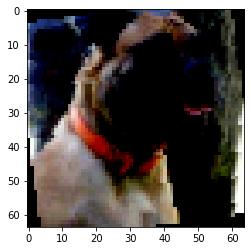

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


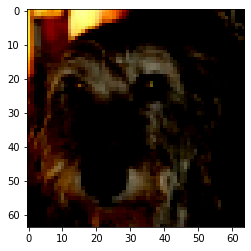

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


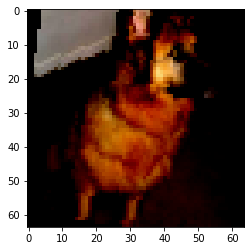

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


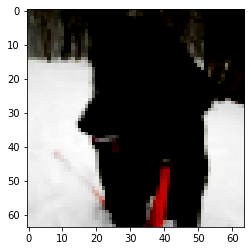

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


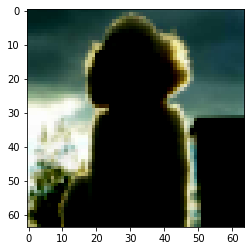

In [0]:
for i in range(5):
    plt.imshow(imgs[i])
    plt.show()

In [0]:
def weights_init(m):
    """
    Takes as input a neural network m that will initialize all its weights.
    """
    classname = m.__class__.__name__
    if classname.find('Conv') != -1:
        m.weight.data.normal_(0.0, 0.02)
    elif classname.find('BatchNorm') != -1:
        m.weight.data.normal_(1.0, 0.02)
        m.bias.data.fill_(0)

In [0]:

class G(nn.Module):
    def __init__(self):
        # Used to inherit the torch.nn Module
        super(G, self).__init__()
        # Meta Module - consists of different layers of Modules
        self.main = nn.Sequential(
                nn.ConvTranspose2d(100, 512, 4, stride=1, padding=0, bias=False),
                nn.BatchNorm2d(512),
                nn.ReLU(True),
                nn.ConvTranspose2d(512, 256, 4, stride=2, padding=1, bias=False),
                nn.BatchNorm2d(256),
                nn.ReLU(True),
                nn.ConvTranspose2d(256, 128, 4, stride=2, padding=1, bias=False),
                nn.BatchNorm2d(128),
                nn.ReLU(True),
                nn.ConvTranspose2d(128, 64, 4, stride=2, padding=1, bias=False),
                nn.BatchNorm2d(64),
                nn.ReLU(True),
                nn.ConvTranspose2d(64, 3, 4, stride=2, padding=1, bias=False),
                nn.Tanh()
                )
        
    def forward(self, input):
        output = self.main(input)
        return output

# Creating the generator
netG = G()
netG.apply(weights_init)

G(
  (main): Sequential(
    (0): ConvTranspose2d(100, 512, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (7): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU(inplace=True)
    (9): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (10): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU(inplace=True)
    (12): ConvTranspose2d(64, 3, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (13): Tanh()
  )
)

In [0]:
# Defining the discriminator
class D(nn.Module):
    def __init__(self):
        super(D, self).__init__()
        self.main = nn.Sequential(
                nn.Conv2d(3, 64, 4, stride=2, padding=1, bias=False),
                nn.LeakyReLU(negative_slope=0.2, inplace=True),
                nn.Conv2d(64, 128, 4, stride=2, padding=1, bias=False),
                nn.BatchNorm2d(128),
                nn.LeakyReLU(negative_slope=0.2, inplace=True),
                nn.Conv2d(128, 256, 4, stride=2, padding=1, bias=False),
                nn.BatchNorm2d(256),
                nn.LeakyReLU(negative_slope=0.2, inplace=True),
                nn.Conv2d(256, 512, 4, stride=2, padding=1, bias=False),
                nn.BatchNorm2d(512),
                nn.LeakyReLU(negative_slope=0.2, inplace=True),
                nn.Conv2d(512, 1, 4, stride=1, padding=0, bias=False),
                nn.Sigmoid()
                )
        
    def forward(self, input):
        output = self.main(input)
        # .view(-1) = Flattens the output into 1D instead of 2D
        return output.view(-1)
    
    
# Creating the discriminator
netD = D()
netD.apply(weights_init)

D(
  (main): Sequential(
    (0): Conv2d(3, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): LeakyReLU(negative_slope=0.2, inplace=True)
    (2): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): LeakyReLU(negative_slope=0.2, inplace=True)
    (5): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (6): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): LeakyReLU(negative_slope=0.2, inplace=True)
    (8): Conv2d(256, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (9): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): LeakyReLU(negative_slope=0.2, inplace=True)
    (11): Conv2d(512, 1, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (12): Sigmoid()
  )
)

In [0]:
!mkdir results
!ls

annotations  images  results  sample_data  stanford-dogs-dataset.zip


In [0]:
EPOCH = 10 # play with me
LR = 0.001
criterion = nn.BCELoss()
optimizerD = optim.Adam(netD.parameters(), lr=LR, betas=(0.5, 0.999))
optimizerG = optim.Adam(netG.parameters(), lr=LR, betas=(0.5, 0.999))

In [0]:
epochs = 2

step = 0
for epoch in range(epochs):
    for ii, (real_images, train_labels) in enumerate(train_loader):
        ############################
        # (1) Update D network: maximize log(D(x)) + log(1 - D(G(z)))
        ###########################
        # train with real
        netD.zero_grad()
        real_images = real_images.to(device)
        batch_size = real_images.size(0)
        labels = torch.full((batch_size, 1), real_label, device=device)

        output = netD(real_images)
        errD_real = criterion(output, labels)
        errD_real.backward()
        D_x = output.mean().item()

        # train with fake
        noise = torch.randn(batch_size, nz, 1, 1, device=device)
        fake = netG(noise)
        labels.fill_(fake_label)
        output = netD(fake.detach())
        errD_fake = criterion(output, labels)
        errD_fake.backward()
        D_G_z1 = output.mean().item()
        errD = errD_real + errD_fake
        optimizerD.step()

        ############################
        # (2) Update G network: maximize log(D(G(z)))
        ###########################
        netG.zero_grad()
        labels.fill_(real_label)  # fake labels are real for generator cost
        output = netD(fake)
        errG = criterion(output, labels)
        errG.backward()
        D_G_z2 = output.mean().item()
        optimizerG.step()
        
        if step % 500 == 0:
            print('[%d/%d][%d/%d] Loss_D: %.4f Loss_G: %.4f D(x): %.4f D(G(z)): %.4f / %.4f'
                  % (epoch + 1, epochs, ii, len(train_loader),
                     errD.item(), errG.item(), D_x, D_G_z1, D_G_z2))
            
            valid_image = netG(fixed_noise)
        step += 1
        
        
# torch.save(netG.state_dict(), 'generator.pth')
# torch.save(netD.state_dict(), 'discriminator.pth')


if not os.path.exists('../output_images'):
    os.mkdir('../output_images')
im_batch_size = 50
n_images=10000
for i_batch in range(0, n_images, im_batch_size):
    gen_z = torch.randn(im_batch_size, 100, 1, 1, device=device)
    gen_images = netG(gen_z)
    images = gen_images.to("cpu").clone().detach()
    images = images.numpy().transpose(0, 2, 3, 1)
    for i_image in range(gen_images.size(0)):
        save_image(gen_images[i_image, :, :, :], os.path.join('../output_images', f'image_{i_batch+i_image:05d}.png'))


import shutil
shutil.make_archive('images', 'zip', '../output_images')


[1/2][0/644] Loss_D: 0.9299 Loss_G: 2.7121 D(x): 0.7024 D(G(z)): 0.3405 / 0.0609
[1/2][500/644] Loss_D: 1.8563 Loss_G: 2.7350 D(x): 0.4711 D(G(z)): 0.5686 / 0.0699
[2/2][356/644] Loss_D: 1.1167 Loss_G: 1.4995 D(x): 0.4185 D(G(z)): 0.1624 / 0.2106


'/content/images.zip'

In [0]:
!ls


annotations  images.zip  sample_data
images	     results	 stanford-dogs-dataset.zip


In [0]:
!unzip \images.zip

Archive:  images.zip
  inflating: image_00996.png         
  inflating: image_05472.png         
  inflating: image_04832.png         
  inflating: image_06192.png         
  inflating: image_05173.png         
  inflating: image_07733.png         
  inflating: image_04778.png         
  inflating: image_06847.png         
  inflating: image_08162.png         
  inflating: image_05656.png         
  inflating: image_01906.png         
  inflating: image_08189.png         
  inflating: image_05478.png         
  inflating: image_02208.png         
  inflating: image_00710.png         
  inflating: image_09295.png         
  inflating: image_02798.png         
  inflating: image_09968.png         
  inflating: image_01707.png         
  inflating: image_08406.png         
  inflating: image_07768.png         
  inflating: image_05463.png         
  inflating: image_01879.png         
  inflating: image_08391.png         
  inflating: image_02826.png         
  inflating: image_09139.png 